In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
training_data = pd.read_csv("Training Data.csv")

In [ ]:
df = pd.DataFrame(training_data)

In [ ]:
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df['city'].nunique(), df['profession'].nunique()

(317, 51)

In [ ]:
df.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [ ]:
X_train = df[['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years']]
y_train = df['risk_flag']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_feat = ['married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state']
num_feat = ['income', 'age', 'experience','current_job_years',
       'current_house_years']

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_feat),
    ("cat", OneHotEncoder(), cat_feat)
])
X_train_prepared = full_pipeline.fit_transform(X_train)

In [ ]:
X_train_prepared.shape

(252000, 409)

In [ ]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=200, random_state=42)
X_train_transformed = pca.fit_transform(X_train_prepared)
X_train_transformed.shape

(252000, 200)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[-1]

0.942765818148678

### Basic Classifiers

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

sgd_clf = SGDClassifier(class_weight='balanced')
y_pred = cross_val_predict(sgd_clf, X_train_prepared, y_train, verbose=2, cv=3, n_jobs=-1)
y_scores = cross_val_predict(sgd_clf, X_train_prepared, y_train, verbose=2, cv=3, n_jobs=-1, method='decision_function')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.1s finished


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
print(roc_auc_score(y_train, y_scores))
print(classification_report(y_train, y_pred))

0.6080852487984894
              precision    recall  f1-score   support

           0       0.91      0.55      0.69    221004
           1       0.16      0.61      0.25     30996

    accuracy                           0.56    252000
   macro avg       0.54      0.58      0.47    252000
weighted avg       0.82      0.56      0.64    252000



In [ ]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(class_weight='balanced')
y_pred = cross_val_predict(svm_clf, X_train_prepared, y_train, verbose=2, cv=3, n_jobs=-1)
y_scores = cross_val_predict(svm_clf, X_train_prepared, y_train, verbose=2, cv=3, n_jobs=-1, method='decision_function')
print(roc_auc_score(y_train, y_scores))
print(classification_report(y_train, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished


0.6173081802793671
              precision    recall  f1-score   support

           0       0.91      0.57      0.70    221004
           1       0.16      0.60      0.26     30996

    accuracy                           0.58    252000
   macro avg       0.54      0.59      0.48    252000
weighted avg       0.82      0.58      0.65    252000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(class_weight='balanced')
y_pred = cross_val_predict(tree_clf, X_train_prepared, y_train, verbose=2, cv=3, n_jobs=-1)
#y_scores = cross_val_predict(tree_clf, X_train_prepared, y_train, verbose=2, cv=3, n_jobs=-1, method='decision_function')
#print(roc_auc_score(y_train, y_scores))

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92    221004
           1       0.49      0.83      0.62     30996

    accuracy                           0.87    252000
   macro avg       0.73      0.85      0.77    252000
weighted avg       0.91      0.87      0.89    252000



## XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict

xgb_clf = XGBClassifier(max_depth=2, min_child_weight=1, eval_metric='auc')
y_pred = cross_val_predict(xgb_clf, X_train_prepared, y_train, verbose=2, cv=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   21.0s finished


In [ ]:
param_grid = [{'eta':[ .5, 1, 2], 'max_depth':[9, 12, 15], 'min_child_weight':[6, 10, 15]} 
             ]
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, verbose=2, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 42.2min finished
C:\Users\Atul PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='auc',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
    

In [ ]:
param_grid = [{'eta':[ .2, .5, 1], 'max_depth':[ 12, 15, 20], 'min_child_weight':[3, 6, 10]} 
             ]
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, verbose=2, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 89.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='auc',
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=2,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'eta': [0.2, 0.5, 1], 'max_depth': [12, 15, 20],
                          'min_child_weight': [3

In [ ]:
grid_search.best_params_

{'eta': 0.5, 'max_depth': 15, 'min_child_weight': 6}

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    221004
           1       0.65      0.56      0.60     30996

    accuracy                           0.91    252000
   macro avg       0.79      0.76      0.77    252000
weighted avg       0.90      0.91      0.91    252000



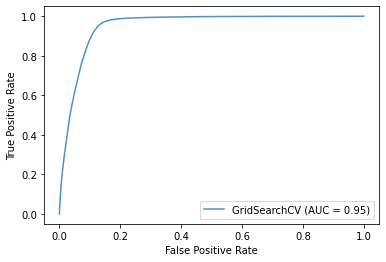

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, grid_search.predict(X_train_prepared)))
from sklearn.metrics import plot_roc_curve

xgb_clf.fit(X_train_prepared, y_train)
ax = plt.gca()
forest_disp = plot_roc_curve(grid_search, X_train_prepared, y_train, ax=ax, alpha=0.8)
plt.show()

# Predictions

In [ ]:
test_data = pd.read_csv("Test Data_underscored.csv")
df_test = pd.DataFrame(test_data)
X_test = df_test[['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years']]
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared.shape

(28000, 409)

In [ ]:
y_test_pred = grid_search.predict(X_test_prepared)
df_output = pd.DataFrame(index = df_test['id'], columns=['risk_flag'], data=y_test_pred)
df_output.to_csv("Output.csv")